# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
browser = Browser('chrome')


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
headers = [th.text for th in table.find('tr').find_all('th')]
rows = [[td.text for td in row.find_all('td')] for row in table.find_all('tr')[1:]]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Clean and convert data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [8]:
# Analyze the data
num_months = df['month'].nunique()
num_sols = df['sol'].nunique()

# Average minimum temperature by Martian month
avg_temp_by_month = df.groupby('month')['min_temp'].mean()
coldest_month = avg_temp_by_month.idxmin()
warmest_month = avg_temp_by_month.idxmax()

# Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

# Output findings
print(f"Number of months on Mars: {num_months}")
print(f"Number of Martian days worth of data: {num_sols}")
print(f"Coldest month: {coldest_month}, Warmest month: {warmest_month}")
print(f"Lowest pressure month: {lowest_pressure_month}, Highest pressure month: {highest_pressure_month}")


Number of months on Mars: 12
Number of Martian days worth of data: 1867
Coldest month: 3, Warmest month: 8
Lowest pressure month: 6, Highest pressure month: 9


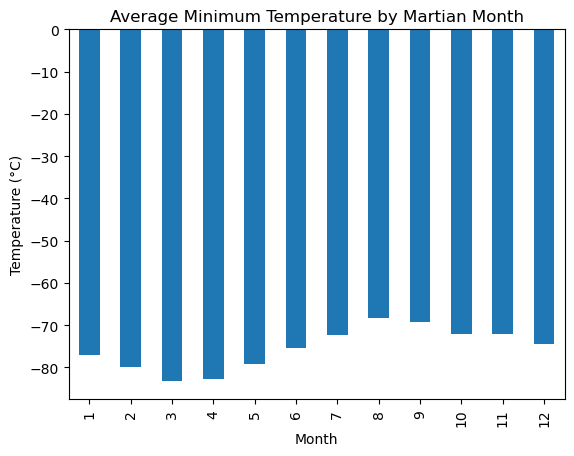

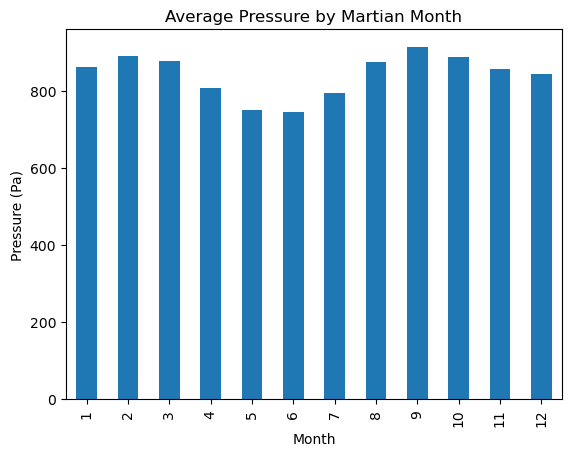

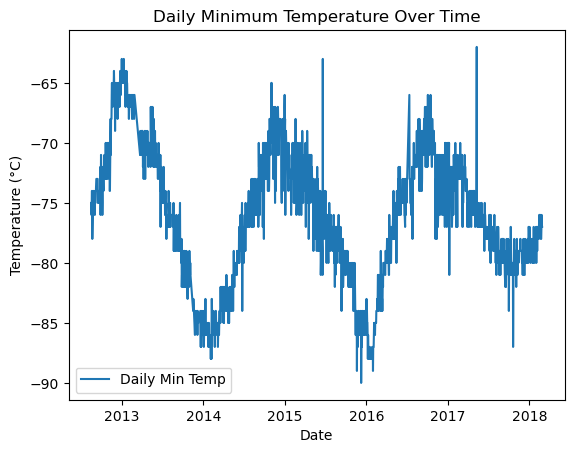

In [9]:
# Visualizations
# Average minimum temperature by month
avg_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Martian Month', xlabel='Month', ylabel='Temperature (°C)')
plt.show()

# Average pressure by month
avg_pressure_by_month.plot(kind='bar', title='Average Pressure by Martian Month', xlabel='Month', ylabel='Pressure (Pa)')
plt.show()

# Daily minimum temperature over time
plt.plot(df['terrestrial_date'], df['min_temp'], label='Daily Min Temp')
plt.title('Daily Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [10]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data exported to 'mars_weather_data.csv'")


Data exported to 'mars_weather_data.csv'


In [11]:
browser.quit()